# 신용 거래 실적을 기반으로 대출의 가능성을 예측

p2p 대출 마켓플레이스에서는 다수의 대출 신청인을 모집해서 대부업체와 연결해 주는 징검다리 역할을 한다.


흔히 중개업자로 볼 수 있으며 해외에서는 Lending tree, Upstart, Lending Club을 예를 들 수 있다.


대출 신청자들의 신청 자격을 보고 대출을 할 가능성이 있는지 평가를 한다.

- entry_id : 유저 식별자
- age: 나이
- pay_schedule: 돈을 받는 빈도
- home_owner: 자택 보유 유무
- income: 소득
- months_employed:
- years_employed: 근무년수
- current_address_year: 거주년수
- personal_account_m: 개인 계좌 보유 월 수 (조합)
- personal_account_y: 개인 계좌 보유 년 수 (조합)
- has_debt: 빚의 유무
- amount_requested: 원하는 대출 금액
- risk_score: 금융 및 엔지니어링 팀 제공
- risk_score_2:
- risk_score_3:
- risk_score_4:
- risk_score_5:
- ext_quality_score: P2P 마켓플레이스 제공
- ext_quality_score_2:
- inquiries_last_month: 신용점수 확인
- e_signed: 반응변수


- 출처: https://www.kaggle.com/datasets/aniruddhachoudhury/esigning-of-loan-based-on-financial-history


리스크 점수를 통해 e-sign까지 도달여부를 예측한다.

# 목차

1. 데이터 읽기
2. 데이터 시각화
    - 히스토그램
    - 상관관계 그래프
3. 데이터 전처리
    - 원 핫 인코딩
    - 특성 선택
4. 모델 구축 (분류성능평가지표)
    - 라쏘
    - SVM
        1. linear
        2. rbf
    - 랜덤포레스트
        - 그리드 검색
            1. Entropy
            2. Gini
5. 결론


# 데이터 읽기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('financial_data.csv')

In [2]:
dataset.describe()

,entry_id,age,home_owner,income,months_employed,years_employed,current_address_year,personal_account_m,personal_account_y,has_debt,amount_requested,risk_score,risk_score_2,risk_score_3,risk_score_4,risk_score_5,ext_quality_score,ext_quality_score_2,inquiries_last_month,e_signed
count,1.790800e+04,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000,17908.000000
mean,5.596978e+06,43.015412,0.425173,3657.214653,1.186006,3.526860,3.584711,3.427183,3.503350,0.795399,950.446449,61086.302211,0.690878,0.878276,0.583155,0.718252,0.623112,0.622068,6.457226,0.538251
std,2.562473e+06,11.873107,0.494383,1504.890063,2.400897,2.259732,2.751937,2.216440,1.955568,0.403421,698.543683,15394.255020,0.090470,0.054563,0.125061,0.120697,0.139729,0.139898,3.673093,0.498549
min,1.111398e+06,18.000000,0.000000,905.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,2100.000000,0.023258,0.451371,0.016724,0.153367,0.010184,0.006622,1.000000,0.000000
25%,3.378999e+06,34.000000,0.000000,2580.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,600.000000,49350.000000,0.640993,0.850882,0.500208,0.633708,0.521735,0.519677,4.000000,0.000000
50%,5.608376e+06,42.000000,0.000000,3260.000000,0.000000,3.000000,3.000000,2.000000,3.000000,1.000000,700.000000,61200.000000,0.699561,0.881004,0.588208,0.725113,0.625944,0.622974,6.000000,1.000000
75%,7.805624e+06,51.000000,1.000000,4670.000000,1.000000,5.000000,5.000000,5.000000,4.000000,1.000000,1100.000000,72750.000000,0.752887,0.912608,0.672395,0.806681,0.729841,0.728940,8.000000,1.000000
max,9.999874e+06,96.000000,1.000000,9985.000000,11.000000,16.000000,12.000000,11.000000,15.000000,1.000000,10200.000000,99750.000000,0.999997,0.999024,0.978932,0.996260,0.970249,0.966953,30.000000,1.000000


In [3]:
# 결측치 확인
dataset.isna().any()

entry_id                False
age                     False
pay_schedule            False
home_owner              False
income                  False
months_employed         False
years_employed          False
current_address_year    False
personal_account_m      False
personal_account_y      False
has_debt                False
amount_requested        False
risk_score              False
risk_score_2            False
risk_score_3            False
risk_score_4            False
risk_score_5            False
ext_quality_score       False
ext_quality_score_2     False
inquiries_last_month    False
e_signed                False
dtype: bool

결측치가 하나도 없는 것을 볼 수 있다.

# 데이터 시각화

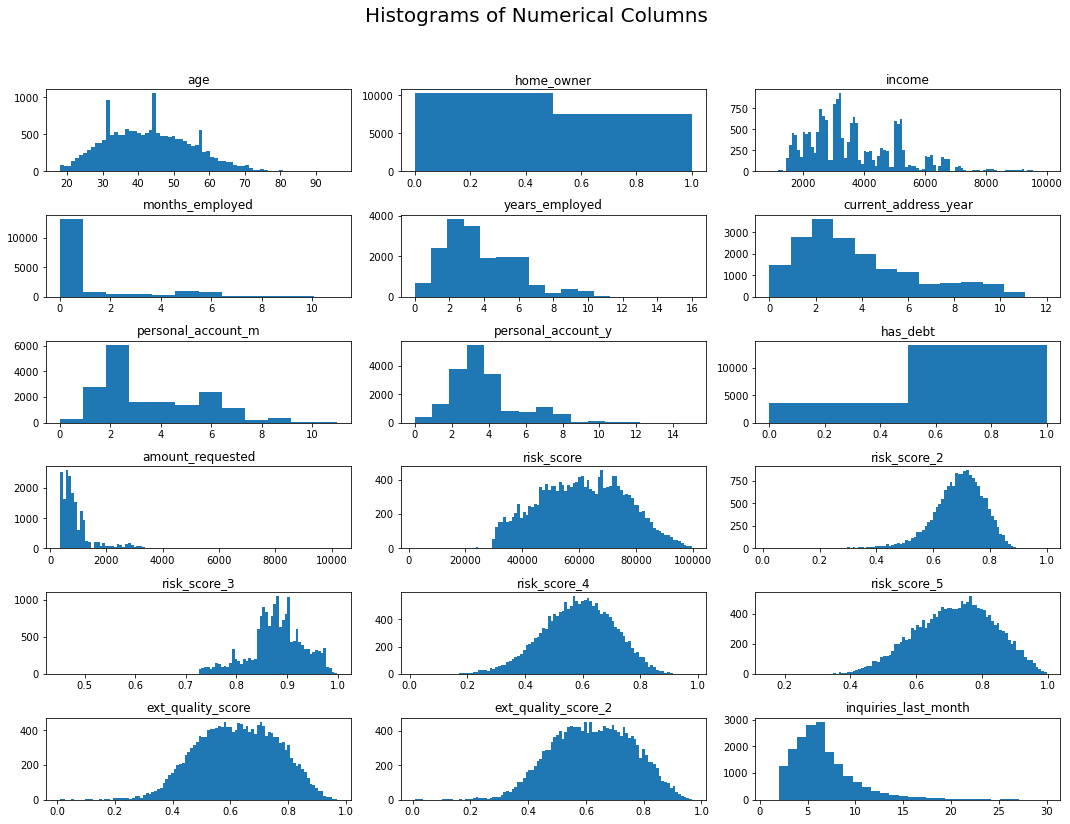

In [4]:
# 히스토그램
dataset2 = dataset.drop(columns = ['entry_id', 'pay_schedule', 'e_signed'])
# 유저 식별자, 범주형, 반응변수로 제외

fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100: 
        vals = 100
    # 100개 넘는 열이 있는 경우 100으로 제한
    plt.hist(dataset2.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

<AxesSubplot:title={'center':'Correlation with E-signed'}>

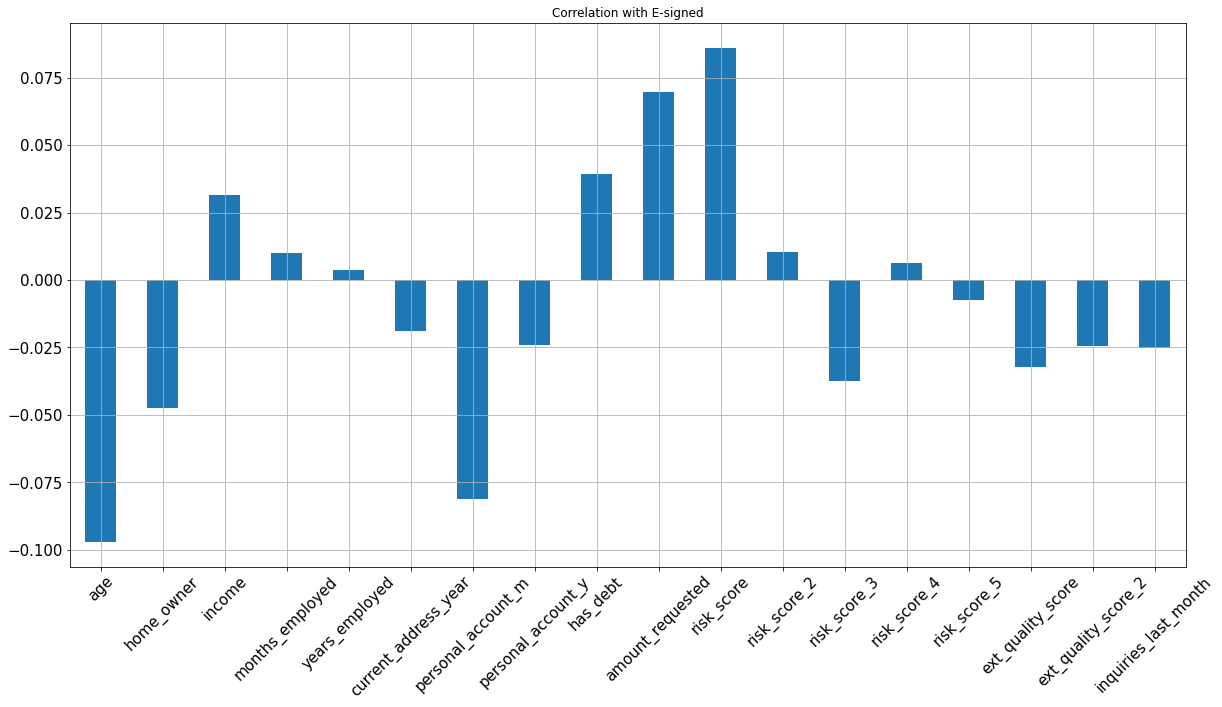

In [5]:
# 상관관계
dataset2.corrwith(dataset.e_signed).plot.bar(
        figsize = (20, 10), title = "Correlation with E-signed", fontsize = 15,
        rot = 45, grid = True)

<ipython-input-6-7e41c262a5a7>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

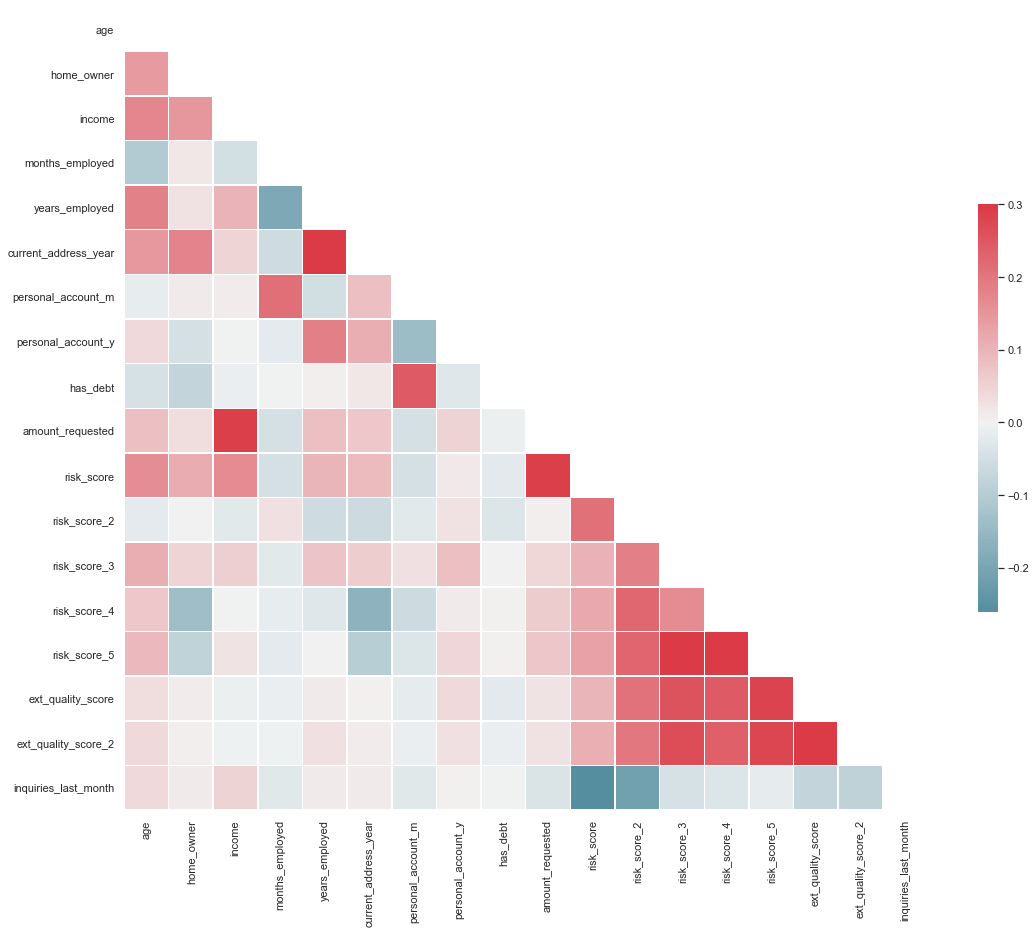

In [6]:
# 상관계수 행렬
sn.set(style="white")
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# 데이터 전처리

In [7]:
#변수 가공
import random
import time

random.seed(100)

dataset = pd.read_csv('financial_data.csv')

dataset = dataset.drop(columns = ['months_employed']) # 제거
dataset['personal_account_months'] = (dataset.personal_account_m + (dataset.personal_account_y * 12)) # 분리된 데이터셋 합치기
dataset = dataset.drop(columns = ['personal_account_m', 'personal_account_y']) # 기존 데이터셋 삭제

In [8]:
# 원 핫 인코딩 ('구독 해지율을 최소화시키자' 주제에서 자세히 다룬다.)
dataset = pd.get_dummies(dataset)
dataset.columns
dataset = dataset.drop(columns = ['pay_schedule_semi-monthly'])

# 여분의 열 제거
response = dataset["e_signed"] #반응변수
users = dataset['entry_id'] #식별자
dataset = dataset.drop(columns = ["e_signed", "entry_id"])

In [9]:
# training + test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [10]:
# 특성 스케일링
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() # 표준 스케일러
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

# 모델구축

In [11]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [12]:
# 테스트 세트 예측
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
acc = accuracy_score(y_test, y_pred) # 정확도
prec = precision_score(y_test, y_pred) # 정밀도
rec = recall_score(y_test, y_pred) # 재현율
f1 = f1_score(y_test, y_pred) # F1 score

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.561977   0.575963  0.705913  0.634351


재현율 약 71% 수준으로 모델이 편향되어 있다. 


정확도가 56% 이기 때문에 다른 방법을 이용해서 더 나은 정확도를 도출내고자 한다.

In [13]:
# SVM 서포트 벡터 머신
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'linear') # 선형으로 설정
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
# 테스트 세트 예측
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred) # 정확도
prec = precision_score(y_test, y_pred) # 정밀도
rec = recall_score(y_test, y_pred) # 재현율
f1 = f1_score(y_test, y_pred) # F1 score

SVM_results = pd.DataFrame([['SVM (linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(SVM_results, ignore_index = True) # 테이블 추가
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.561977   0.575963  0.705913  0.634351
1               SVM (linear)  0.568398   0.577832  0.735477  0.647193


In [15]:
# SVM(rbf)
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# 테스트 세트 예측
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [16]:
# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [17]:
print(results)

                       Model  Accuracy  Precision    Recall  F1 Score
0  Linear Regression (Lasso)  0.561977   0.575963  0.705913  0.634351
1               SVM (linear)  0.568398   0.577832  0.735477  0.647193
2                  SVM (RBF)  0.591569   0.605730  0.690871  0.645505
3      Random Forest (n=100)  0.621720   0.640098  0.678942  0.658948


In [18]:
# k-겹 교차 검증
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.63 (+/- 0.03)


### 그리드 검색

In [19]:
# 랜덤 포레스트가 가장 높은 정확도가 나왔기 때문에 파라미터를 조정해서 더 좋은 모델로 바꿔보자.
# Entropy
parameters = {"max_depth": [3, None], # 트리 내에서 도달 가능한 최대 깊이
              "max_features": [1, 5, 10], # 가장 적절한 분할을 찾기 위한 인자
              'min_samples_split': [2, 5, 10], # 2가 기본값
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 2989.16 seconds


(0.6345122647725013,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [20]:
# 더 나은 변수를 찾기 위해 Entropy를 이용하여 한 번 더 검색해본다.
parameters = {"max_depth": [None],
              "max_features": [3, 5, 7],
              'min_samples_split': [8, 10, 12],
              'min_samples_leaf': [1, 2, 3],
              "bootstrap": [True],
              "criterion": ["entropy"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 987.92 seconds


(0.6356302654508454,
 {'bootstrap': True,
  'criterion': 'entropy',
  'max_depth': None,
  'max_features': 5,
  'min_samples_leaf': 2,
  'min_samples_split': 12})

첫 번째에서 얻은 결과와 차이가 거의 없다.


가장 적합하다는 것을 알 수 있다.

In [21]:
# 테스트에 적용시켜보자.
y_pred = grid_search.predict(X_test) # 그리드로 변환
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Entropy)', acc, prec, rec, f1]], # 엔트로피
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [22]:
# Gini를 이용해보자.
parameters = {"max_depth": [3, None],
              "max_features": [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              "bootstrap": [True, False],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 1926.72 seconds


(0.6353512282315882,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 5,
  'min_samples_split': 2})

In [23]:
# 마찬가지로 Gini를 이용하여 한 번 더 도출해본다.
parameters = {"max_depth": [None],
              "max_features": [8, 10, 12],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [8, 10, 12],
              "bootstrap": [True],
              "criterion": ["gini"]}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = classifier, # Make sure classifier points to the RF model
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)

t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 945.00 seconds


(0.635420816975755,
 {'bootstrap': True,
  'criterion': 'gini',
  'max_depth': None,
  'max_features': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 2})

In [28]:
# Predicting Test Set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100, GSx2 + Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                                   Model  Accuracy  Precision    Recall  \
0              Linear Regression (Lasso)  0.561977   0.575963  0.705913   
1                           SVM (linear)  0.568398   0.577832  0.735477   
2                              SVM (RBF)  0.591569   0.605730  0.690871   
3                  Random Forest (n=100)  0.621720   0.640098  0.678942   
4  Random Forest (n=100, GSx2 + Entropy)  0.625070   0.640828  0.690353   
5     Random Forest (n=100, GSx2 + Gini)  0.630932   0.646236  0.694502   
6     Random Forest (n=100, GSx2 + Gini)  0.630932   0.646236  0.694502   

   F1 Score  
0  0.634351  
1  0.647193  
2  0.645505  
3  0.658948  
4  0.664669  
5  0.669500  
6  0.669500  


# 모델 완성

In [27]:
final_results = pd.concat([y_test, users], axis = 1).dropna()
final_results['predictions'] = y_pred
final_results = final_results[['entry_id', 'e_signed', 'predictions']]
print(final_results)

       entry_id  e_signed  predictions
8       6493191       1.0            0
9       8908605       1.0            0
12      6889184       1.0            1
16      9375601       0.0            1
18      8515555       1.0            1
...         ...       ...          ...
17881   5028251       1.0            1
17888   8958068       0.0            0
17890   3605941       0.0            1
17901   1807355       0.0            1
17907   1498559       1.0            1

[3582 rows x 3 columns]


# 결론

엔트로피를 이용한 랜덤 포레스트 방법이 64%로 가장 높은 정확도를 보여줬다.


학습 시키는데 시간이 매우 오래걸려서 프로젝트를 힘들게 끝냈다.


앞서 공부했던 '구독 해지율 예측하기'에서도 랜덤 포레스트를 이용하여


더 높은 정확도를 이끌어 낼 수 있기에 이 주제를 정리하고 다음 시간에 이용해 보려고 한다.